# Data Analysis Tools
# Assignment: Generating a Correlation Coefficient

Following is the Python program I wrote to fulfill the third assignment of the [Data Analysis Tools online course](https://www.coursera.org/learn/data-analysis-tools/home/welcome).

I decided to use [Jupyter Notebook](http://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Index.ipynb) as it is a pretty way to write code and present results.

## Research question

Using the [Gapminder database](http://www.gapminder.org/), I would like to see if an increasing Internet usage results in an increasing suicide rate. A study shows that other factors like unemployment could have a great impact.

So for this assignment, the three following variables will be analyzed:

- Internet Usage Rate (per 100 people)
- Suicide Rate (per 100 000 people)
- Unemployment Rate (% of the population of age 15+)


## Data management

For the question I'm interested in, the countries for which data are missing will be discarded. As missing data in Gapminder database are replace directly by `NaN` no special data treatment is needed.

In [1]:
# Magic command to insert the graph directly in the notebook
%matplotlib inline
# Load a useful Python libraries for handling data
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

In [2]:
# Read the data
data_filename = r'gapminder.csv'
data = pd.read_csv(data_filename, low_memory=False)
data = data.set_index('country')

General information on the Gapminder data

In [3]:
display(Markdown("Number of countries: {}".format(len(data))))
display(Markdown("Number of variables: {}".format(len(data.columns))))

Number of countries: 213

Number of variables: 15

In [4]:
# Convert interesting variables in numeric format
for variable in ('internetuserate', 'suicideper100th', 'employrate'):
    data[variable] = pd.to_numeric(data[variable], errors='coerce')


But the unemployment rate is not provided directly. In the database, the employment rate (% of the popluation) is available. So the unemployement rate will be computed as `100 - employment rate`:

In [5]:
data['unemployrate'] = 100. - data['employrate']

The first records of the data restricted to the three analyzed variables are:

In [6]:
subdata = data[['internetuserate', 'suicideper100th', 'unemployrate']]
subdata.tail(10)

,internetuserate,suicideper100th,unemployrate
country,,,
United States,74.247572,9.927033,37.700001
Uruguay,47.867469,14.537270,42.500000
Uzbekistan,19.445021,5.213720,42.500000
Vanuatu,7.988367,4.983422,NaN
Venezuela,35.850437,4.119620,40.099998
Vietnam,27.851822,11.653322,29.000000
West Bank and Gaza,36.422772,NaN,68.000000
"Yemen, Rep.",12.349750,6.265789,61.000000
Zambia,10.124986,12.019036,39.000000


## Data analysis

The distribution of the three variables have been analyzed [previously](Visualizing_Data.ipynb).



## Variance analysis

As all variables are quantitative, the Pearson correlation test is the one to apply.

Let's first focus on the primary research question;

- The explanatory variable is the internet use rate (quantitative variable)
- The response variable is the suicide per 100,000 people (quantitative variable)

From the scatter plot, a slope slightly positive is seen. But will the Pearson test confirm this is significant?

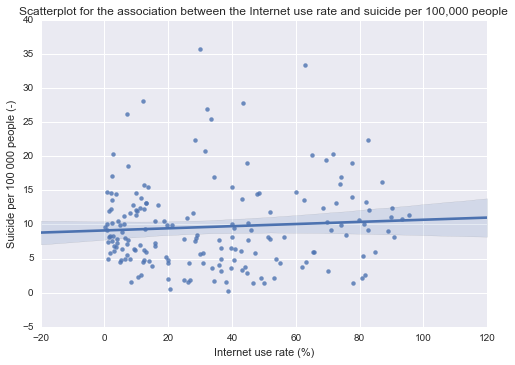

In [7]:
sns.regplot(x='internetuserate', y='suicideper100th', data=subdata)
plt.xlabel('Internet use rate (%)')
plt.ylabel('Suicide per 100 000 people (-)')
_ = plt.title('Scatterplot for the association between the Internet use rate and suicide per 100,000 people')

In [8]:
data_clean = subdata.dropna()
correlation, pvalue = stats.pearsonr(data_clean['internetuserate'], data_clean['suicideper100th'])

display(Markdown("The correlation coefficient is {:.3g} and the associated p-value is {:.3g}.".format(correlation, pvalue)))

The correlation coefficient is 0.0735 and the associated p-value is 0.351.

The correlation coefficient is 0.0735 confirming the small positive correlation. But the Pearson test tells us that **the null hypothesis cannot be rejected** as the p-value is 0.351 >> 0.05.

This confirms the conclusion found when grouping the internet use rate in quartile and applying [ANOVA test](Analysis_Variance.ipynb).

If we look now at the relationship between unemployment and suicide, it seems that there is no relationship looking at the scatterplot below.

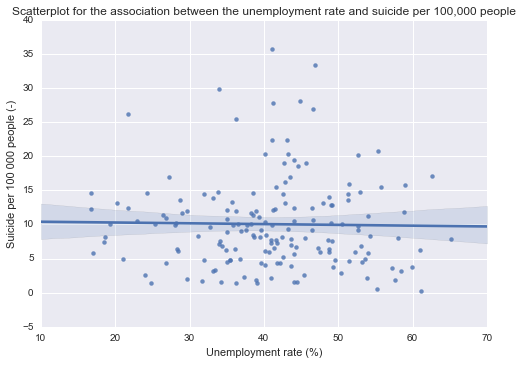

In [9]:
sns.regplot(x='unemployrate', y='suicideper100th', data=subdata)
plt.xlabel('Unemployment rate (%)')
plt.ylabel('Suicide per 100 000 people (-)')
_ = plt.title('Scatterplot for the association between the unemployment rate and suicide per 100,000 people')

Does the Pearson test confirms that conclusion?

In [10]:
correlation, pvalue = stats.pearsonr(data_clean['unemployrate'], data_clean['suicideper100th'])

display(Markdown("The correlation coefficient is {:.3g} and the associated p-value is {:.3g}.".format(correlation, pvalue)))

The correlation coefficient is -0.0121 and the associated p-value is 0.878.

The correlation coefficient is negative but really small and the p-value is large. So we can safetly conclude that there is no relationship between the unemployment rate and the suicide per 100,000 people.

## Another test case

In order to look at the coefficient of determination, an another relationship that is significant will be analyzed below: Is the residential electricity consumption (response variable) related to the income per person (explanatory variable)?

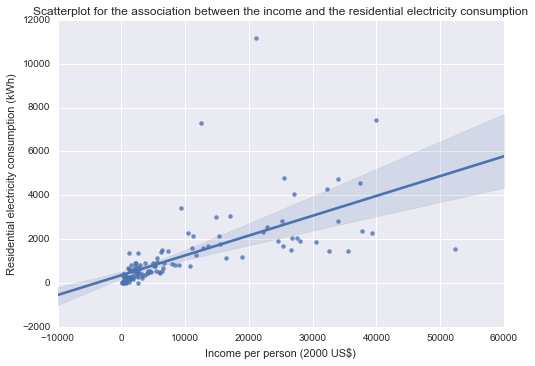

In [11]:
subdata2 = (data[['incomeperperson', 'relectricperperson']]
                .assign(income=lambda x: pd.to_numeric(data['incomeperperson'], errors='coerce'),
                        electricity=lambda x: pd.to_numeric(data['relectricperperson'], errors='coerce'))
                .dropna())

sns.regplot(x='income', y='electricity', data=subdata2)
plt.xlabel('Income per person (2000 US$)')
plt.ylabel('Residential electricity consumption (kWh)')
_ = plt.title('Scatterplot for the association between the income and the residential electricity consumption')

In [12]:
correlation, pvalue = stats.pearsonr(subdata2['income'], subdata2['electricity'])

display(Markdown("The correlation coefficient is {:.3g} and the associated p-value is {:.3g}.".format(correlation, pvalue)))
display(Markdown("And the coefficient of determination is {:.3g}.".format(correlation**2)))

The correlation coefficient is 0.652 and the associated p-value is 4.63e-17.

And the coefficient of determination is 0.425.

The Pearson test proves a significant positive relationship between income per person and residential electricity consumption as the p-value is below 0.05.

Moreover, the square of the correlation coefficient, i.e. the coefficient of determination, is 0.425. This means that we can predict 42.5% of the variability of residential electricity consumption knowing the income per person.

And this concludes this third assignment.

> If you are interested into data sciences, follow me on [Tumblr](http://fcollonval.tumblr.com/).